In [1]:
# julia code with python plotting

using PythonPlot, Compat
include("Source.jl")

errprint (generic function with 2 methods)

In [2]:
# create list of all transistions
W_AB = 0.01
W_BC = 0.05
W_CD = 0.07
W_DE = 0.12
W_EF = 0.15
W_CF = 0.10
W_CE = 0.09

# eigentransitions
W_AA = 1 - W_AB
W_BB = 1 - W_AB - W_BC
W_CC = 1 - W_BC - W_CD - W_CE - W_CF
W_DD = 1 - W_CD - W_DE
W_EE = 1 - W_DE - W_EF - W_CE
W_FF = 1 - W_EF - W_CF

# transition Matrix
W = [W_AA W_AB 0 0 0 0;
    W_AB W_BB W_BC 0 0 0;
    0 W_BC W_CC W_CD W_CE W_CF;
    0 0 W_CD W_DD W_DE 0;
    0 0 W_CE W_DE W_EE W_EF;
    0 0 W_CF 0 W_EF W_FF]

6×6 Matrix{Float64}:
 0.99  0.01  0.0   0.0   0.0   0.0
 0.01  0.94  0.05  0.0   0.0   0.0
 0.0   0.05  0.69  0.07  0.09  0.1
 0.0   0.0   0.07  0.81  0.12  0.0
 0.0   0.0   0.09  0.12  0.64  0.15
 0.0   0.0   0.1   0.0   0.15  0.75

In [3]:
# create initial state
P1 = [1, 0, 0, 0, 0, 0]
P2 = [0.5, 0, 0.5, 0, 0, 0]

# create logspace
steps = floor.(logrange(1, 10^4, 500))
# add 0 to steps
steps = vcat(0, steps)

# create empty arrays
P1arr = Vector{Float64}[zeros(6) for _ in steps]
P2arr = Vector{Float64}[zeros(6) for _ in steps]

# initialize arrays
P1arr[1] = P1
P2arr[1] = P2

# iterate over steps
for (i, j) in enumerate(steps[2:end])
    P1arr[i+1] = W^j * P1
    P2arr[i+1] = W^j * P2
end

# transpose for plotting
P1arr = hcat(P1arr...)
P2arr = hcat(P2arr...)

# calculate deviation from equilibrium for each state by summing the absolute difference from the mean value
dev1 = sum(abs.(P1arr .- mean(P1arr, dims=1)), dims=1)
dev2 = sum(abs.(P2arr .- mean(P2arr, dims=1)), dims=1)

# equilibrium if deviation is smaller than 0.01
eq1 = findfirst(dev1 .< 0.01)[2]
eq2 = findfirst(dev2 .< 0.01)[2]

print("Equilibrium at step $eq1 for P1 and at step $eq2 for P2")

Equilibrium at step 339 for P1 and at step 328 for P2

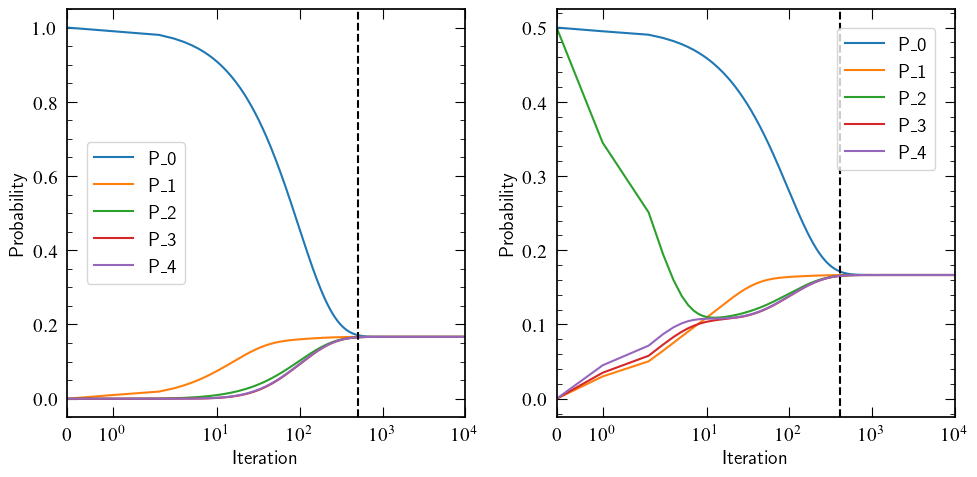

In [4]:
ax = subplots(1, 2, figsize=(10, 5))[1]

for i in 1:5
    ax[0].plot(steps, P1arr[i, :], label="P_$(i-1)")
    ax[1].plot(steps, P2arr[i, :], label="P_$(i-1)")
end
# plot equilibrium as vertical line
ax[0].axvline(steps[eq1], color="black", linestyle="--")
ax[1].axvline(steps[eq2], color="black", linestyle="--")
for i in [0, 1]
    ax[i].set_xscale("symlog")
    ax[i].set_ylabel("Probability")
    ax[i].set_xlabel("Iteration")
    ax[i].set_xlim(0, 10^4)
    ax[i].legend()
end
tight_layout()
gcf()

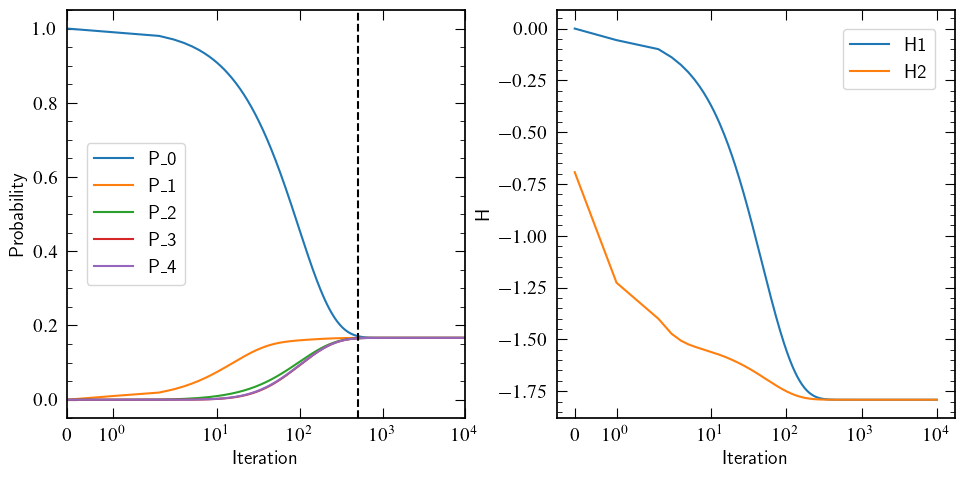

In [5]:
# calculate H for each state
H1 = sum(P1arr .* log.(P1arr .+ 1e-4), dims=1)
H2 = sum(P2arr .* log.(P2arr .+ 0.0001), dims=1)

# clear figure and plot H
cla()
plot(steps, H1[1, :], label="H1")
plot(steps, H2[1, :], label="H2")
xscale("symlog") 
ylabel("H")
xlabel("Iteration")
legend()
gcf()

Beide Systeme erreichen den gleichen Endwert, mit unterschiedlicher Geschwindigkeit. 